<a href="https://colab.research.google.com/github/Wander03/lab-2-phase-2-nallen19/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Andrew_Kerr_%7C_Nick_Allen_%7C_Carly_Scheuerman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [64]:
import pandas as pd
import numpy as np

In [65]:
data_dir = "https://dlsun.github.io/pods/data/"
df_funds = pd.read_csv(data_dir + "ca_dds_expenditures.csv")

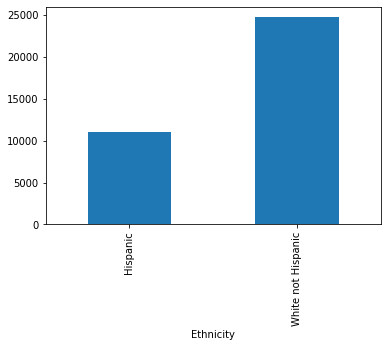

In [66]:
df_funds[(df_funds["Ethnicity"] == "White not Hispanic") | (df_funds["Ethnicity"] == "Hispanic")].groupby("Ethnicity")["Expenditures"].mean().plot.bar()

White expenditures appear to be slightly more than 2 times larger than Hispanic expenditures.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

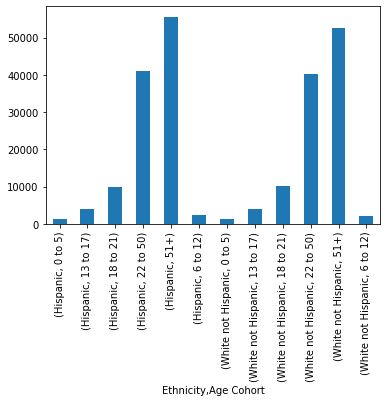

In [67]:
df_funds[(fd_funds["Ethnicity"] == "White not Hispanic") | (fd_funds["Ethnicity"] == "Hispanic")].groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().plot.bar()

When accounting for age cohorts, it appears that each cohort gets the same amount of expenditures, regardless of whether they are White or Hispanic. If anything, those in the Hispanic expenditures are slightly greater for the 51+ age cohort. This contradicts the results from Question 1 which show that White expenditures are greater than Hispanic.

In [68]:
df_funds.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

One potential confounding variable when looking at expenditures is age. Since these funds are for disabled residents, we might expect more money to go to older citizens since older citizens are more likely to have a health complications causing disabilities than younger citizens.

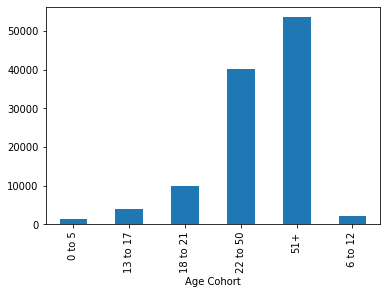

In [69]:
df_funds.groupby("Age Cohort")["Expenditures"].mean().plot.bar()

In the bar chart above, we confirm our suspicions that most of the money is going to older citizens. We see that citizens who are 51 years or older recieve the largest amount of expenditures, then 22 years to 50 years old, and then there is a substancial drop off in money recieved by citizens ages 0 to 21.

Now we need to look at the distribution of ages among White and Hispanic citizens.

Ethnicity
Hispanic              AxesSubplot(0.125,0.125;0.775x0.755)
White not Hispanic    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

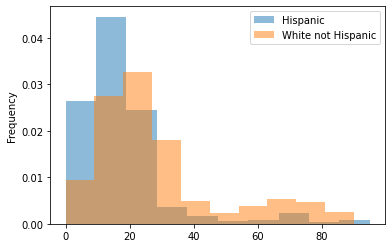

In [70]:
df_funds[(fd_funds["Ethnicity"] == "White not Hispanic") | (fd_funds["Ethnicity"] == "Hispanic")].groupby("Ethnicity")["Age"].plot.hist(density = True, alpha = 0.5, legend=True)

In this distirbution, we see that a majority of Hispanic citizens are below 30 yers old, while more White citizens are older than 20 years old. When only looking at expenditures by ethnicity it would appear that White citizens are recieving much more money than Hispanic. However, this is becuase there are more elderly White citizens than Hispanic, and older citizens tend to recieve disability money more than younger citizens. Therefore, more White citizens will recieve expenditures than Hispanic citizens.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.